## Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/SURAJ/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understand the data

In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1560,7338-ERIVA,Male,0,No,Yes,39,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,No,Bank transfer (automatic),45.05,1790.6,No
1778,6181-AXXYF,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.1,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
5696,0156-FVPTA,Male,0,Yes,No,22,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,54.20,1152.7,Yes
1248,7321-PKUYW,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,90.15,987.95,Yes
4540,6728-WYQBC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,20.95,No
1356,0196-JTUQI,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,633.85,No
5797,1169-WCVAK,Male,0,Yes,No,19,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.80,1672.35,No
6278,7208-PSIHR,Female,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.30,7188.5,No
3571,8980-WQFWL,Female,0,No,No,35,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,62.10,2096.1,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Data Manipulation

In [11]:
df = df.drop("customerID", axis=1)

In [12]:
df[df["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['TotalCharges'])

In [18]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check the outliers

In [19]:
def outliers(df):
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5* IQR)) | (df[col] > (Q3 + 1.5*IQR))]
        print(f"{col} - Outliers:")
        print(f"Number of outliers: {outliers.shape[0]}")
        print(outliers[[col]]) 
        print("-------------------------")

In [20]:
outliers(df)

SeniorCitizen - Outliers:
Number of outliers: 1142
      SeniorCitizen
20                1
30                1
31                1
34                1
50                1
...             ...
7023              1
7029              1
7031              1
7032              1
7041              1

[1142 rows x 1 columns]
-------------------------
tenure - Outliers:
Number of outliers: 0
Empty DataFrame
Columns: [tenure]
Index: []
-------------------------
MonthlyCharges - Outliers:
Number of outliers: 0
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
-------------------------
TotalCharges - Outliers:
Number of outliers: 0
Empty DataFrame
Columns: [TotalCharges]
Index: []
-------------------------


## Data Visualization

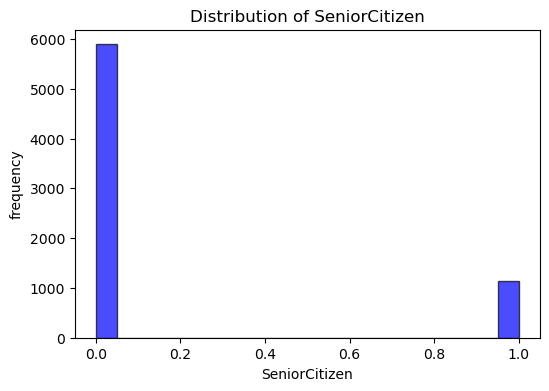

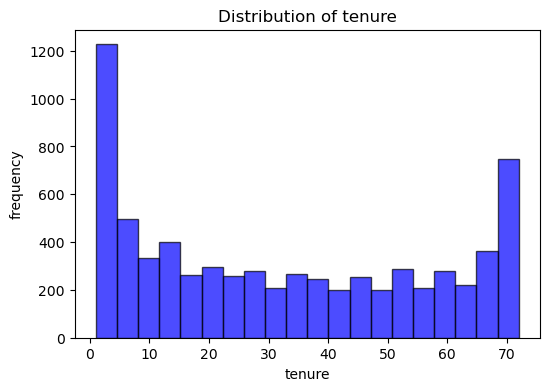

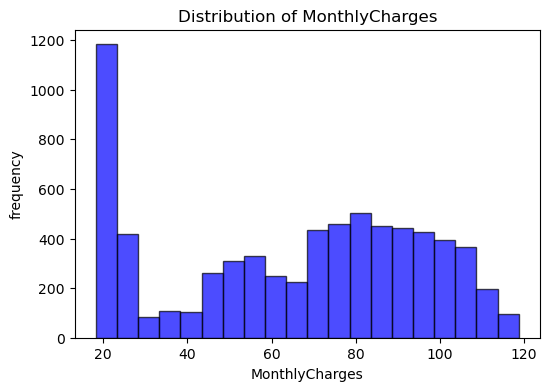

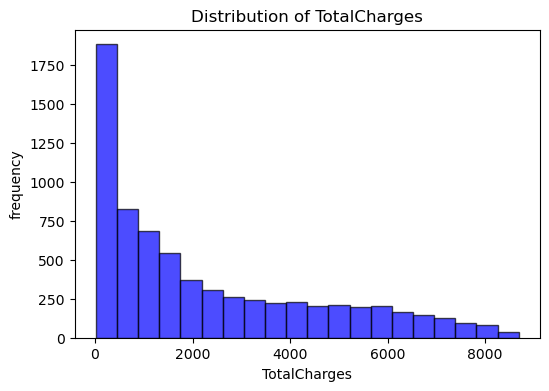

In [21]:
def plot_numeric_distributions(df):
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col], bins=20, color='blue',edgecolor='black', alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('frequency')
        plt.tight_layout
        plt.show()
plot_numeric_distributions(df)

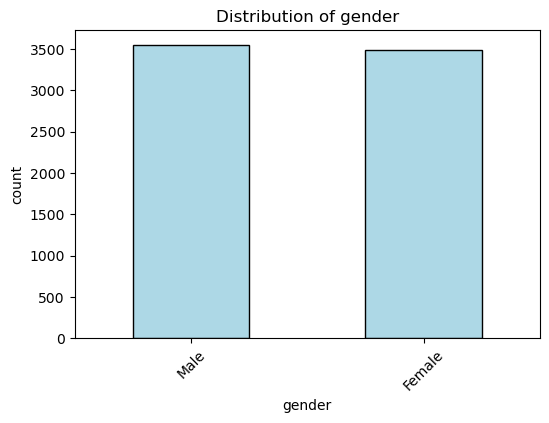

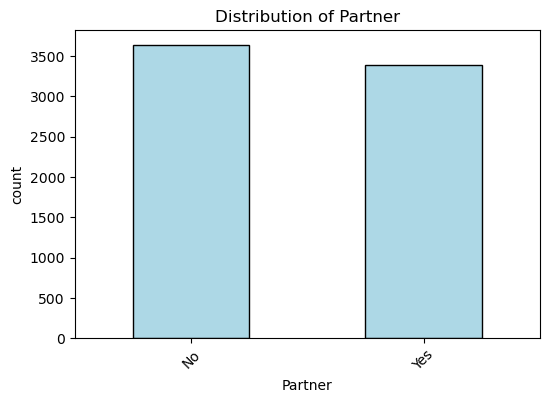

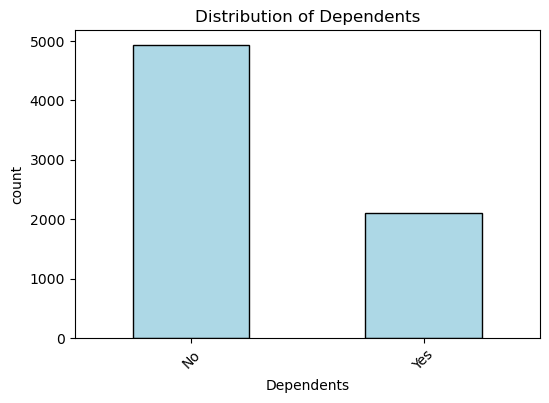

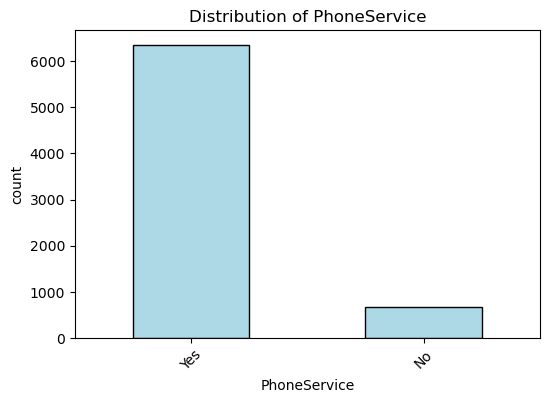

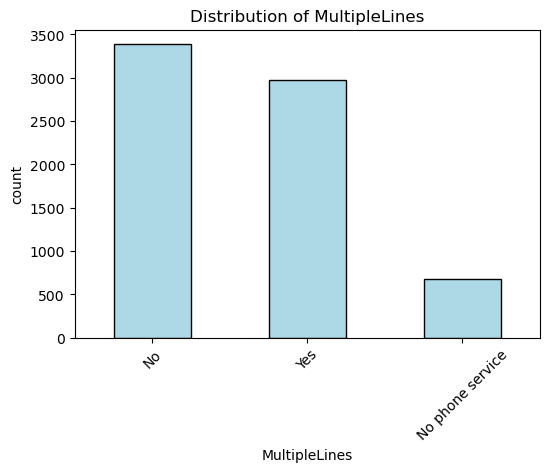

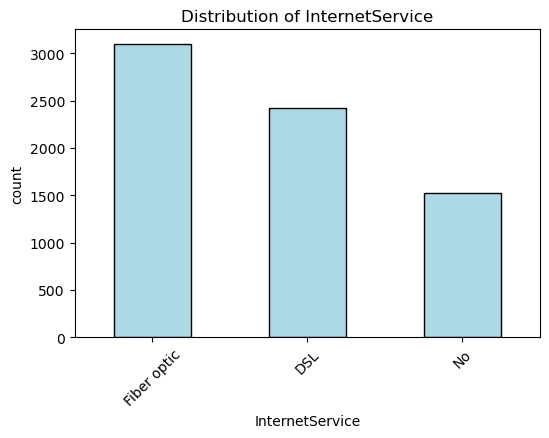

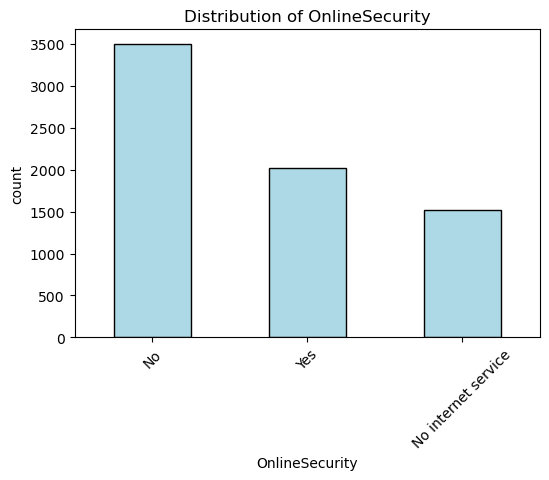

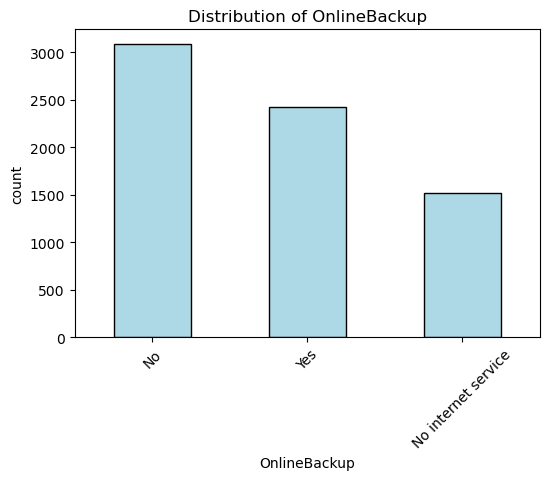

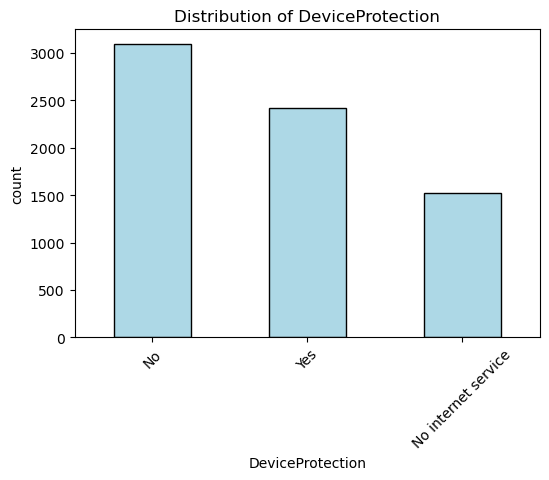

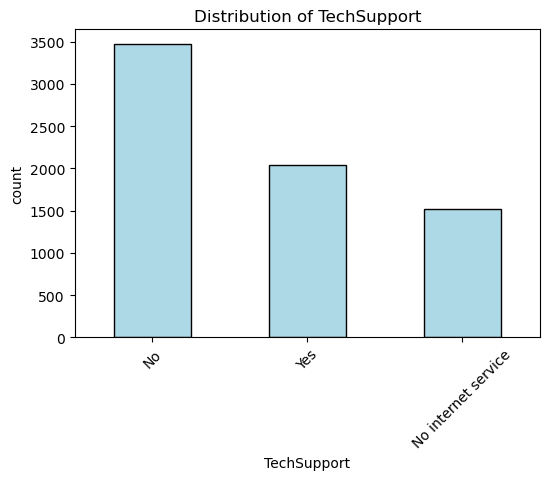

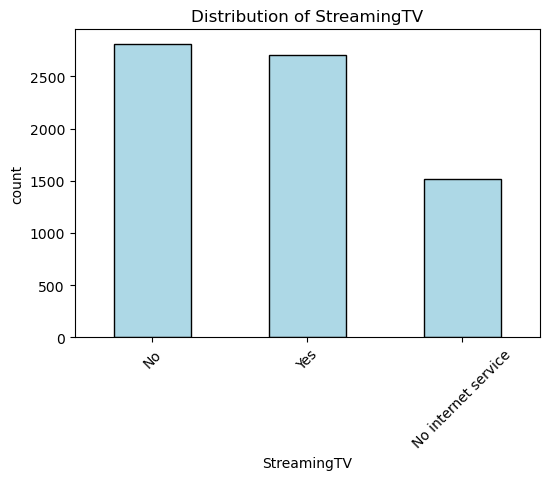

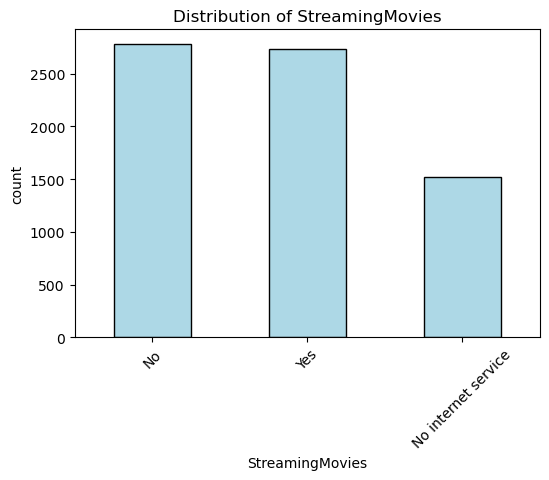

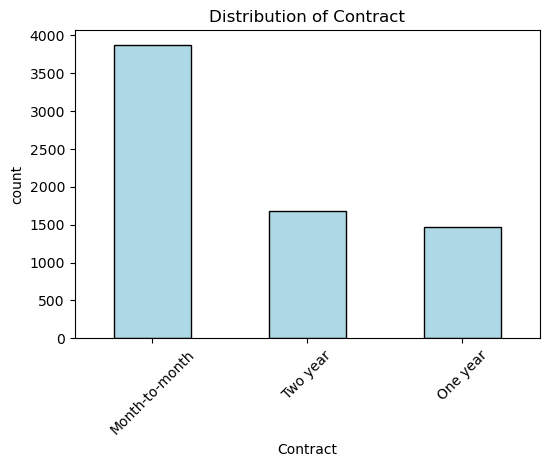

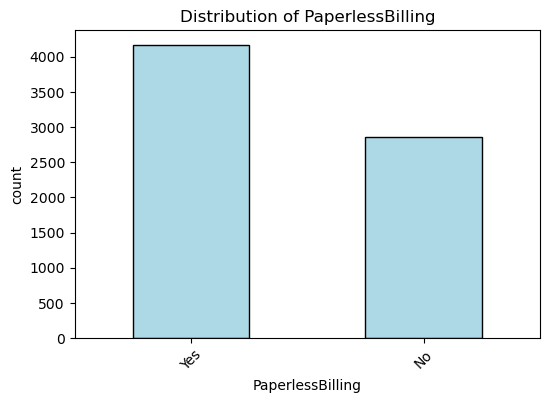

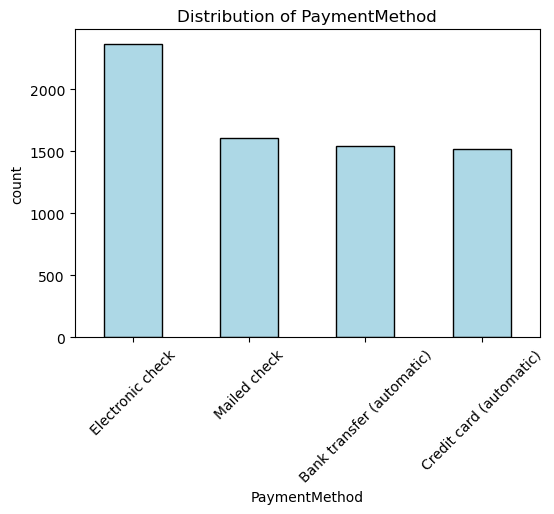

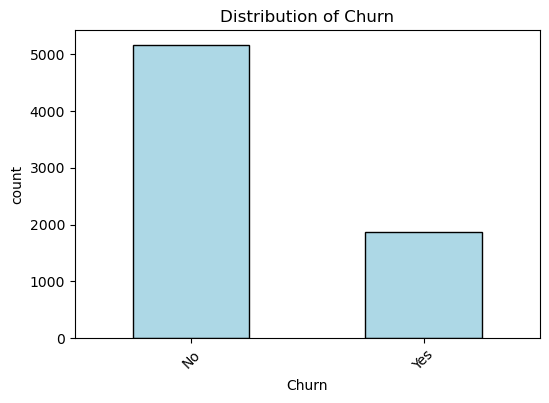

In [22]:
def plot_categorical_barcharts(df, max_unique=30):
    categorical_cols = df.select_dtypes(include=['object','category']).columns
    
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        df[col].value_counts().plot(kind='bar',color='lightblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("count")
        plt.xticks(rotation=45)
        plt.show()
plot_categorical_barcharts(df, max_unique=30)

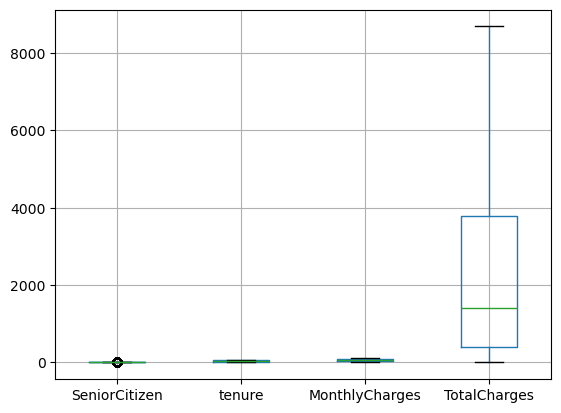

In [23]:
df.boxplot()
plt.show()

### Number of Customer vs Churn Status

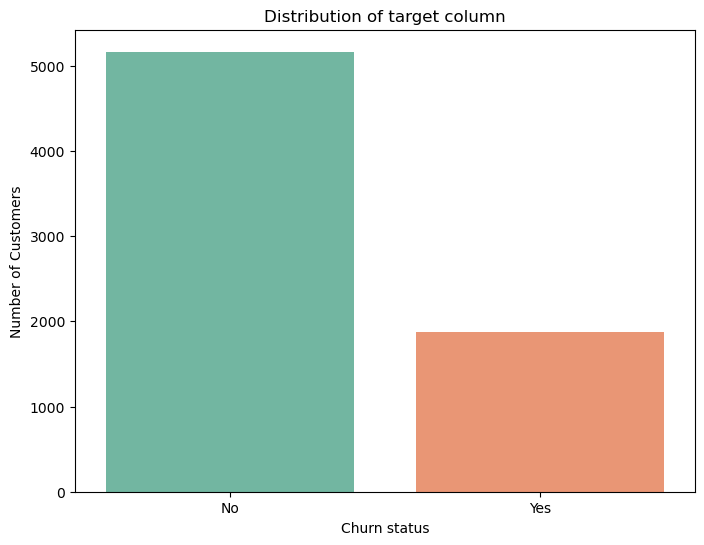

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Churn', palette='Set2')

plt.title("Distribution of target column")
plt.xlabel("Churn status")
plt.ylabel("Number of Customers")

plt.show()

### Gender vs TotalCount

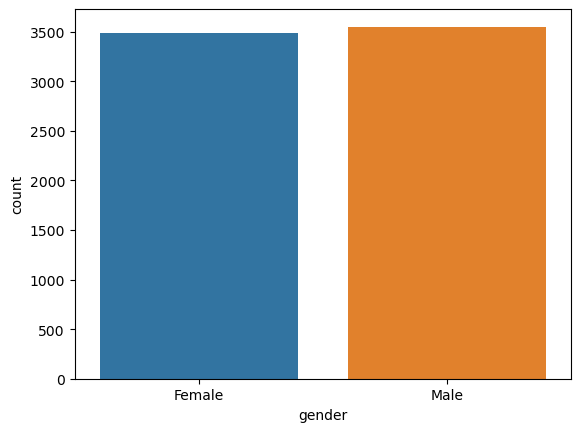

In [25]:
sns.countplot(data=df, x='gender')
plt.show()

### PaymentMethod vs TotalCount

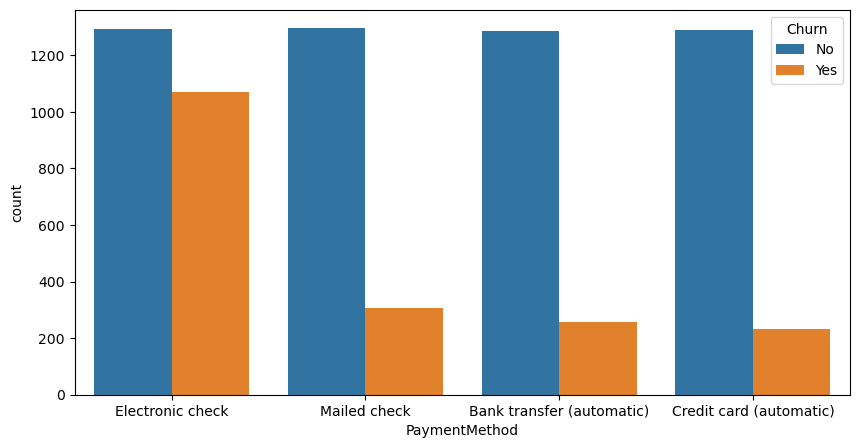

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.show()

### Churn vs MonthlyCharges and TotalCharges

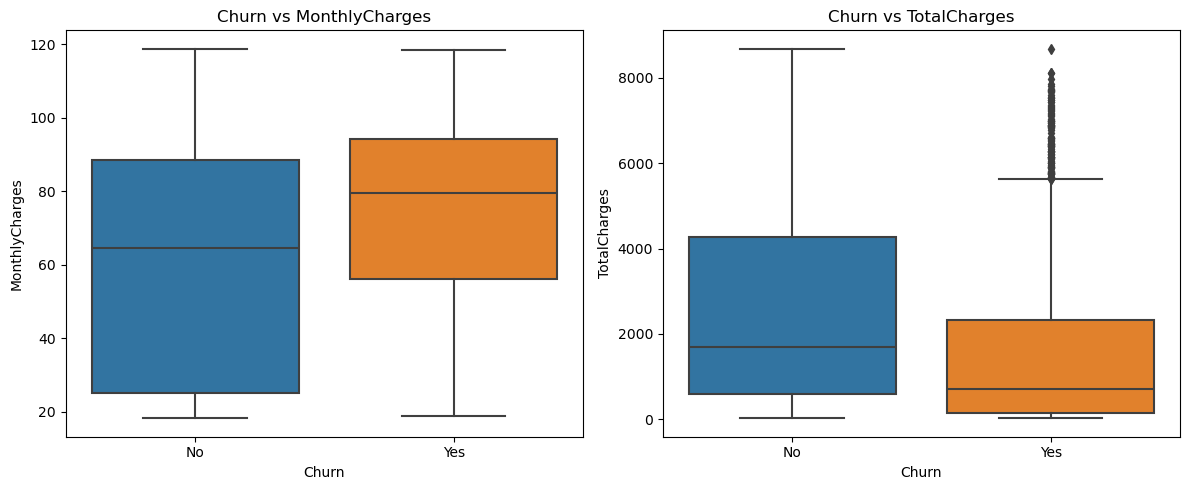

In [27]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
axes[0].set_title("Churn vs MonthlyCharges")

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title("Churn vs TotalCharges")

plt.tight_layout()
plt.show()

### Correlation of churn dataset

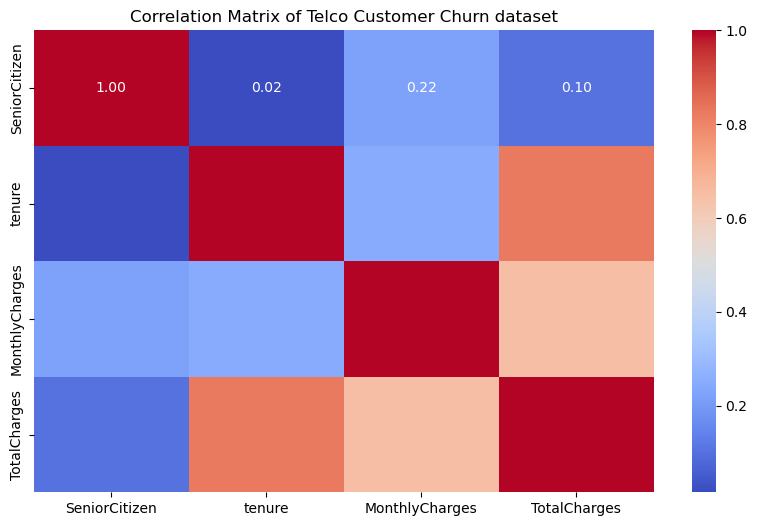

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Telco Customer Churn dataset")
plt.show()

### Churn vs Not Churn

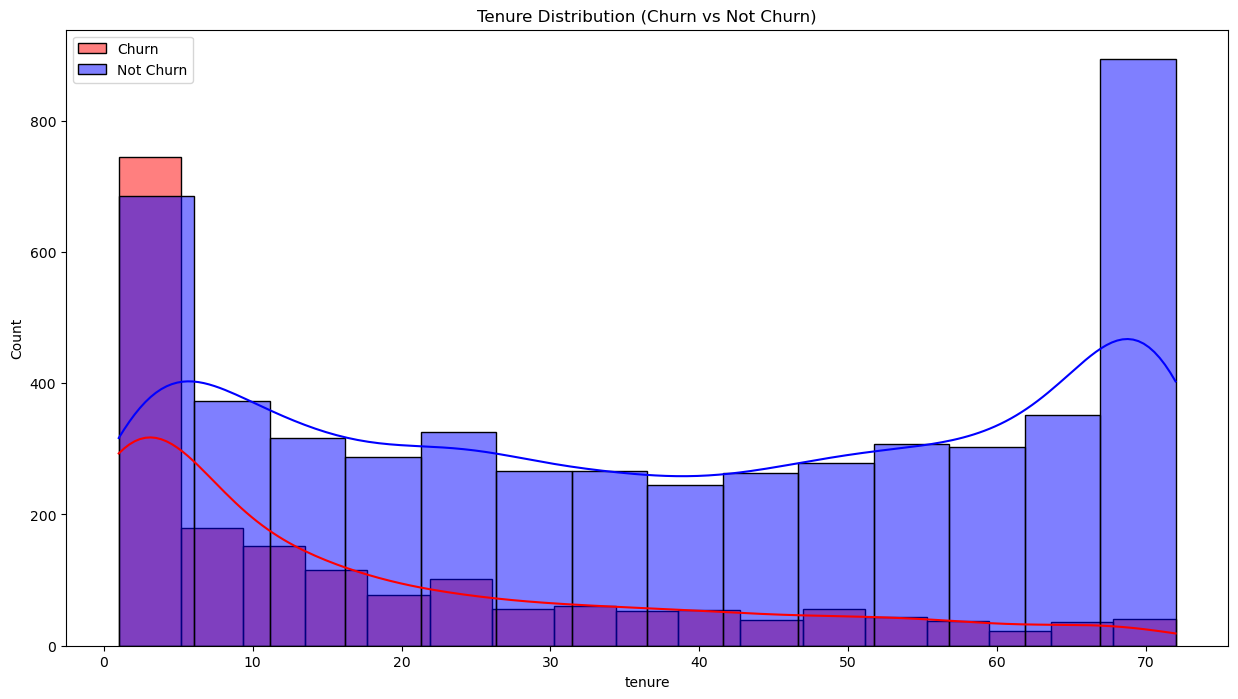

In [29]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['Churn']=='Yes']['tenure'], color="red", label='Churn', kde=True)
sns.histplot(df[df['Churn']=='No']['tenure'], color="blue", label='Not Churn', kde=True)

plt.legend()
plt.title("Tenure Distribution (Churn vs Not Churn)")

plt.show()

### StreamingTV VS Churn

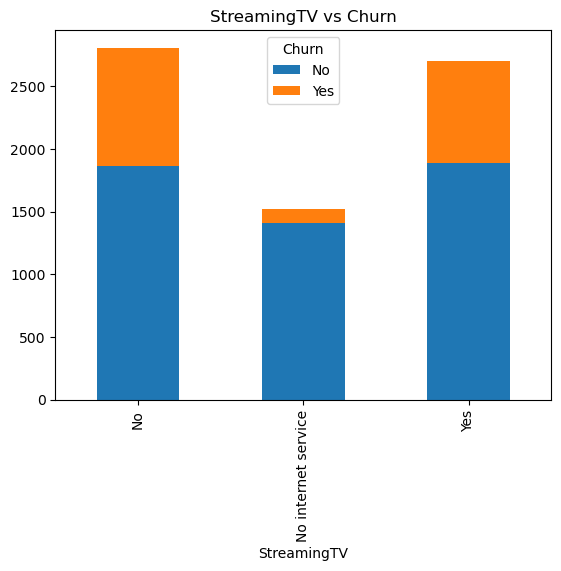

In [30]:
pd.crosstab(df['StreamingTV'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("StreamingTV vs Churn")
plt.show()

## Regression Analyze

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_enc = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])
    
X = df.drop(columns=["Churn"])
y = df["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Shape of the Model

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_lin

0.1469064670735967

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.7853589196872779

### SVM Model

In [35]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.7938877043354655

### Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7263681592039801